In [30]:
import pandas as pd

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.model_selection import GroupShuffleSplit

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
spotify = pd.read_csv('spotify.csv')
spotify.drop(columns={'Unnamed: 0'}, inplace=True)

In [9]:
spotify.isna().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [10]:
spotify = spotify.dropna()

In [11]:
spotify.isna().sum()

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [13]:
X = spotify.copy().dropna()

y = X.pop('track_popularity')

artists = X['track_artist']

In [16]:
feature_num = ['danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'duration_ms']

feature_cat = ['playlist_genre']

In [17]:
preprocessor = make_column_transformer(
                        (StandardScaler(),feature_num),
                        (OneHotEncoder(),feature_cat),
)

In [18]:
def group_split(X,y,group,train_size=0.75):
    splitter = GroupShuffleSplit(train_size=train_size)
    train, test = next(splitter.split(X,y,groups=group))
    return (X.iloc[train],X.iloc[test],y.iloc[train],y.iloc[test])

In [19]:
X_train, X_valid, y_train, y_valid = group_split(X,y,artists)

In [20]:
X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.fit_transform(X_valid)

In [23]:
y_train = y_train/100
y_valid = y_valid / 100

In [26]:
input_shape = [X_train.shape[1]]
print("Input shape : {}".format(input_shape))

Input shape : [18]


In [34]:
model = keras.Sequential([
                # Added first layer
                layers.Dense(1,input_shape=input_shape),
])

model.compile(
            optimizer='adam',
            loss='mae',
)

history = model.fit(
                    X_train, y_train,
                    validation_data=(X_valid,y_valid),
                    batch_size=512,
                    epochs=50,
                    verbose=0,

)

history_df = pd.DataFrame(history.history)

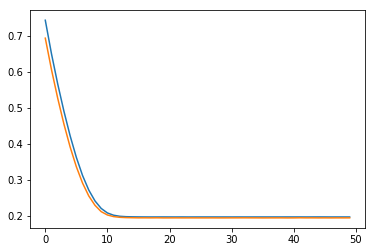

In [36]:
plt.plot(history_df.loc[0:,['loss','val_loss']])